In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('2021-2022 Football Team Stats.csv', sep=';',encoding='latin-1')
df.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,38,29,6,3,99,26,73,93,2.45,89.0,27.2,61.9,1.63,52774,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,38,28,8,2,94,26,68,92,2.42,89.2,34.2,55.0,1.45,53367,Mohamed Salah - 23,Alisson
2,3,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,33176,Robert Lewandowski - 35,Manuel Neuer
3,4,Paris S-G,FRA,1,38,26,8,4,90,36,54,86,2.26,76.5,38.6,37.9,1.00,41188,Kylian Mbappé - 28,Keylor Navas
4,5,Real Madrid,ESP,1,38,26,8,4,80,31,49,86,2.26,74.3,47.0,27.3,0.72,41235,Karim Benzema - 27,Thibaut Courtois
5,6,Milan,ITA,1,38,26,8,4,69,31,38,86,2.26,63.1,34.8,28.3,0.74,42388,Olivier Giroud Rafael Leão - 11,Mike Maignan
6,7,Inter,ITA,2,38,25,9,4,84,32,52,84,2.21,81.4,39.2,42.2,1.11,41407,Lautaro Martínez - 21,Samir Handanovi?
7,8,Napoli,ITA,3,38,24,7,7,74,31,43,79,2.08,59.4,31.9,27.6,0.73,26681,Victor Osimhen - 14,David Ospina
8,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58,41800,Erling Haaland - 22,Gregor Kobel
9,10,Chelsea,ENG,3,38,21,11,6,76,33,43,74,1.95,67.2,36.0,31.3,0.82,36443,Mason Mount - 11,Edouard Mendy


In [7]:
df = df.drop(['Rk', 'Country', 'GD', 'Pts', 'xG','xGD','xGA','Top Team Scorer','Goalkeeper','MP','LgRk'], axis = 1)
df

,Squad,W,D,L,GF,GA,Pts/G,xGD/90,Attendance
0,Manchester City,29,6,3,99,26,2.45,1.63,52774
1,Liverpool,28,8,2,94,26,2.42,1.45,53367
2,Bayern Munich,24,5,5,97,37,2.26,1.50,33176
3,Paris S-G,26,8,4,90,36,2.26,1.00,41188
4,Real Madrid,26,8,4,80,31,2.26,0.72,41235
...,...,...,...,...,...,...,...,...,...
93,Genoa,4,16,18,27,60,0.74,-0.36,11628
94,Venezia,6,9,23,34,69,0.71,-0.96,6705
95,Watford,6,5,27,34,77,0.61,-0.73,20614
96,Norwich City,5,7,26,23,84,0.58,-1.15,26836


In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['W']])
df['W'] = scaler.transform(df[['W']])

scaler.fit(df[['D']])
df['D'] = scaler.transform(df[['D']])

scaler.fit(df[['L']])
df['L'] = scaler.transform(df[['L']])

scaler.fit(df[['GF']])
df['GF'] = scaler.transform(df[['GF']])

scaler.fit(df[['GA']])
df['GA'] = scaler.transform(df[['GA']])

scaler.fit(df[['Attendance']])
df['Attendance'] = scaler.transform(df[['Attendance']])

scaler.fit(df[['xGD/90']])
df['xGD/90'] = scaler.transform(df[['xGD/90']])

scaler.fit(df[['Pts/G']])
df['Pts/G'] = scaler.transform(df[['Pts/G']])

df.head()

,Squad,W,D,L,GF,GA,Pts/G,xGD/90,Attendance
0,Manchester City,1.000000,0.230769,0.04,1.000000,0.000000,1.000000,1.000000,0.697146
1,Liverpool,0.961538,0.384615,0.00,0.934211,0.000000,0.984375,0.935252,0.705960
2,Bayern Munich,0.807692,0.153846,0.12,0.973684,0.169231,0.901042,0.953237,0.405856
3,Paris S-G,0.884615,0.384615,0.08,0.881579,0.153846,0.901042,0.773381,0.524941
4,Real Madrid,0.884615,0.384615,0.08,0.750000,0.076923,0.901042,0.672662,0.525639


In [9]:
k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['W','D','L','GF','GA','Pts/G','xGD/90','Attendance']])
    list_dist.append(kmeans_modelim.inertia_)

C:\Users\fbmer\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


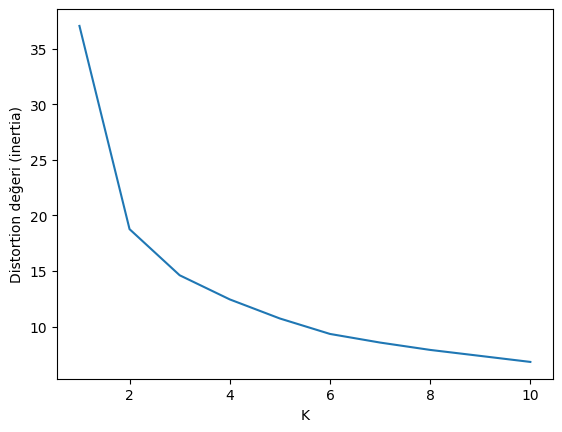

In [10]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [11]:
kmeans_modelim = KMeans(n_clusters = 3)
y_predicted = kmeans_modelim.fit_predict(df[['W','D','L','GF','GA','Pts/G','xGD/90','Attendance']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
df['cluster'] = y_predicted
df.head(20)

,Squad,W,D,L,GF,GA,Pts/G,xGD/90,Attendance,cluster
0,Manchester City,1.000000,0.230769,0.04,1.000000,0.000000,1.000000,1.000000,0.697146,2
1,Liverpool,0.961538,0.384615,0.00,0.934211,0.000000,0.984375,0.935252,0.705960,2
2,Bayern Munich,0.807692,0.153846,0.12,0.973684,0.169231,0.901042,0.953237,0.405856,2
3,Paris S-G,0.884615,0.384615,0.08,0.881579,0.153846,0.901042,0.773381,0.524941,2
4,Real Madrid,0.884615,0.384615,0.08,0.750000,0.076923,0.901042,0.672662,0.525639,2
5,Milan,0.884615,0.384615,0.08,0.605263,0.076923,0.901042,0.679856,0.542776,2
6,Inter,0.846154,0.461538,0.08,0.802632,0.092308,0.875000,0.812950,0.528196,2
7,Napoli,0.807692,0.307692,0.20,0.671053,0.076923,0.807292,0.676259,0.309319,2
8,Dortmund,0.730769,0.000000,0.28,0.815789,0.400000,0.781250,0.622302,0.534037,2
9,Chelsea,0.692308,0.615385,0.16,0.697368,0.107692,0.739583,0.708633,0.454414,2


In [14]:
df.tail(20)

,Squad,W,D,L,GF,GA,Pts/G,xGD/90,Attendance,cluster
78,Stuttgart,0.153846,0.692308,0.52,0.236842,0.507692,0.229167,0.348921,0.314834,1
79,Hertha BSC,0.230769,0.230769,0.68,0.184211,0.692308,0.229167,0.190647,0.262039,1
80,Sampdoria,0.269231,0.230769,0.80,0.302632,0.569231,0.218750,0.208633,0.042895,1
81,Lorient,0.192308,0.692308,0.64,0.157895,0.569231,0.218750,0.334532,0.096953,1
82,Spezia,0.269231,0.230769,0.80,0.236842,0.692308,0.218750,0.147482,0.007580,1
83,Clermont Foot,0.230769,0.461538,0.72,0.197368,0.661538,0.218750,0.338129,0.067702,1
84,Burnley,0.153846,0.846154,0.60,0.144737,0.415385,0.203125,0.244604,0.197577,1
85,Levante,0.192308,0.615385,0.68,0.368421,0.769231,0.203125,0.417266,0.135122,1
86,Saint-Étienne,0.153846,0.615385,0.72,0.250000,0.784615,0.161458,0.223022,0.236861,1
87,Arminia,0.076923,0.769231,0.56,0.052632,0.415385,0.151042,0.053957,0.162054,1


In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [16]:
df1

,Squad,W,D,L,GF,GA,Pts/G,xGD/90,Attendance,cluster
15,Sevilla,0.576923,1.000000,0.08,0.394737,0.061538,0.682292,0.464029,0.355024,0
16,Juventus,0.653846,0.538462,0.24,0.447368,0.169231,0.682292,0.539568,0.234200,0
17,Monaco,0.653846,0.461538,0.28,0.552632,0.215385,0.671875,0.564748,0.000000,0
20,Nice,0.653846,0.307692,0.36,0.381579,0.153846,0.630208,0.525180,0.142806,0
21,RB Leipzig,0.538462,0.307692,0.32,0.644737,0.169231,0.614583,0.643885,0.241587,0
22,Betis,0.615385,0.384615,0.36,0.513158,0.215385,0.614583,0.517986,0.533279,0
23,Lazio,0.576923,0.538462,0.32,0.710526,0.492308,0.598958,0.485612,0.228374,0
24,Union Berlin,0.500000,0.461538,0.28,0.355263,0.276923,0.598958,0.507194,0.121522,0
25,Strasbourg,0.538462,0.692308,0.28,0.486842,0.261538,0.588542,0.571942,0.261474,0
26,Roma,0.576923,0.461538,0.36,0.473684,0.261538,0.588542,0.651079,0.518356,0


In [17]:
df2

,Squad,W,D,L,GF,GA,Pts/G,xGD/90,Attendance,cluster
52,Brest,0.384615,0.461538,0.56,0.342105,0.476923,0.380208,0.280576,0.085598,1
55,Wolfsburg,0.346154,0.230769,0.56,0.263158,0.430769,0.369792,0.402878,0.091379,1
56,Bochum,0.346154,0.230769,0.56,0.197368,0.400000,0.369792,0.244604,0.137559,1
57,Osasuna,0.346154,0.615385,0.52,0.184211,0.384615,0.369792,0.334532,0.167018,1
60,Brentford,0.384615,0.307692,0.64,0.328947,0.461538,0.354167,0.402878,0.164180,1
61,Bologna,0.346154,0.538462,0.56,0.276316,0.446154,0.354167,0.316547,0.118534,1
63,Montpellier,0.346154,0.307692,0.68,0.342105,0.538462,0.312500,0.273381,0.064625,1
64,Augsburg,0.269231,0.384615,0.56,0.210526,0.461538,0.307292,0.201439,0.138630,1
65,Rayo Vallecano,0.307692,0.461538,0.64,0.210526,0.369231,0.302083,0.399281,0.029667,1
66,Elche,0.307692,0.461538,0.64,0.223684,0.400000,0.302083,0.165468,0.145214,1


In [18]:
df3

,Squad,W,D,L,GF,GA,Pts/G,xGD/90,Attendance,cluster
0,Manchester City,1.000000,0.230769,0.04,1.000000,0.000000,1.000000,1.000000,0.697146,2
1,Liverpool,0.961538,0.384615,0.00,0.934211,0.000000,0.984375,0.935252,0.705960,2
2,Bayern Munich,0.807692,0.153846,0.12,0.973684,0.169231,0.901042,0.953237,0.405856,2
3,Paris S-G,0.884615,0.384615,0.08,0.881579,0.153846,0.901042,0.773381,0.524941,2
4,Real Madrid,0.884615,0.384615,0.08,0.750000,0.076923,0.901042,0.672662,0.525639,2
5,Milan,0.884615,0.384615,0.08,0.605263,0.076923,0.901042,0.679856,0.542776,2
6,Inter,0.846154,0.461538,0.08,0.802632,0.092308,0.875000,0.812950,0.528196,2
7,Napoli,0.807692,0.307692,0.20,0.671053,0.076923,0.807292,0.676259,0.309319,2
8,Dortmund,0.730769,0.000000,0.28,0.815789,0.400000,0.781250,0.622302,0.534037,2
9,Chelsea,0.692308,0.615385,0.16,0.697368,0.107692,0.739583,0.708633,0.454414,2
